# Tutorial notebook on how to plot hex maze configurations and barrier change sequences

First let's import the functions we'll need from `hex_maze_utils` (where all of our functions live)

In [1]:
import sys
sys.path.append("..")  # Use sys to add the parent directory (where hex_maze_utils lives) to the path

# Import our custom plotting functions
from hex_maze_utils import plot_hex_maze, plot_barrier_change_sequence

# 1. Plot a single hex maze configuration

We can use the function `plot_hex_maze` to visualize a maze configuration.

First let's take a look at the documentation for this function:

In [2]:
from hex_maze_utils import plot_hex_maze

# View the documentation for this function
help(plot_hex_maze)

Help on function plot_hex_maze in module hex_maze_utils:

plot_hex_maze(barriers, old_barrier=None, new_barrier=None)
    Given a set of barriers specifying a hex maze, plot the maze.
    Open hexes are shown in light blue, connected by thin grey lines.
    Barriers are shown in dark grey. Choice point(s) are in yellow.
    
    Option to specify old barrier location and new barrier location 
    to indicate a barrier change configuration:
    The now-open hex where the barrier used to be is shown in pale red.
    The new barrier is shown in dark red.
    
    Args:
    barriers (set): A set defining the hexes where barriers are placed in the maze.
    old_barrier (int): Optional - The hex where the barrier was in the previous maze.
    new_barrier (int): Optional - The hex where the new barrier is in this maze.



Now let's use the `plot_hex_maze` function to plot a hex maze.

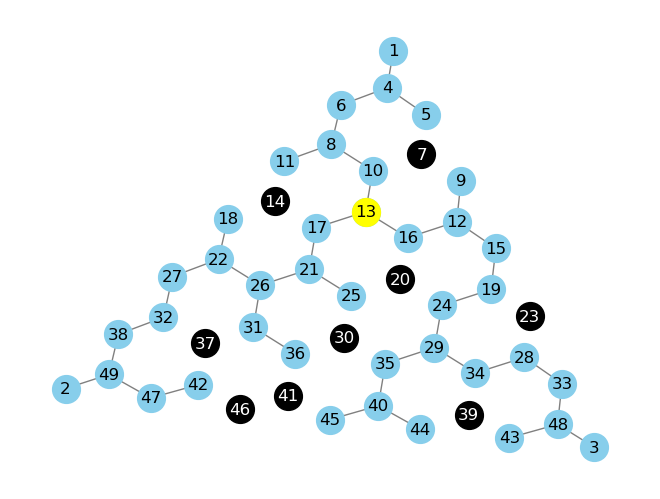

In [3]:
# Hex maze configurations are represented as a set of barriers.
example_maze = {37, 7, 39, 41, 14, 46, 20, 23, 30}

# Use the function plot_hex_maze to visualize a maze configuration.
plot_hex_maze(example_maze)

Open hexes are shown in light blue, connected by thin grey lines. Barriers are shown in dark grey. Choice point(s) are automatically indicated in yellow.

# 2. Plot a single barrier change hex maze configuration

We can also use the `plot_hex_maze` function to visualize a barrier change.

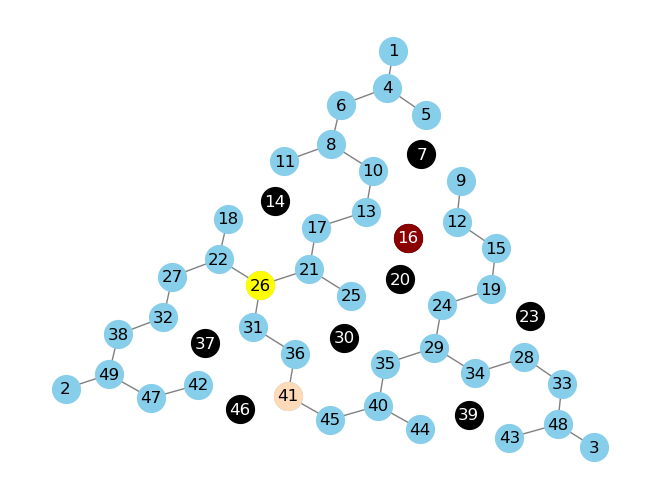

In [4]:
# This is a maze in a barrier sequence that created by moving barrier 41 to barrier 16.
example_maze = {37, 39, 7, 46, 14, 16, 20, 23, 30}
old_barrier = 41
new_barrier = 16

# Use the function plot_hex_maze to visualize this barrier change configuration.
plot_hex_maze(example_maze, old_barrier, new_barrier)

This plot is the same as before, but the now-open hex where the barrier used to be (hex 41) is shown in pale red. The location where this barrier was moved to (hex 16) is shown in dark red.

# 3. Plot a barrier change sequence

Often we don't want to visualize a barrier change on a single maze - we want to plot the entire barrier change sequence. 

We can do this with the function `plot_barrier_change_sequence`.

Let's take a look at the documentation for this function:

In [5]:
from hex_maze_utils import plot_barrier_change_sequence

# View the documentation for this function
help(plot_barrier_change_sequence)

Help on function plot_barrier_change_sequence in module hex_maze_utils:

plot_barrier_change_sequence(barrier_sequence)
    Given a sequence of barrier sets that each differ by the movement of 
    a single barrier, plot each maze in the sequence with the moved barriers
    indicated on each maze.
    
    Open hexes are shown in light blue, connected by thin grey lines.
    Barriers are shown in dark grey. Choice point(s) are in yellow.
    The now-open hex where the barrier used to be is shown in pale red.
    The new barrier is shown in dark red.
    
    Args:
    barrier_sequence (list of sets): List of sequential barrier sets



Barrier set 0: {37, 7, 39, 41, 14, 46, 20, 23, 30}


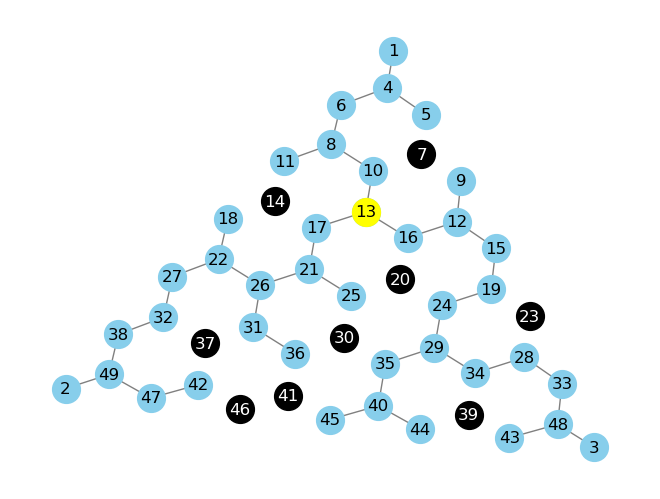

Barrier change: 41 -> 16
Barrier set 1: {37, 39, 7, 46, 14, 16, 20, 23, 30}


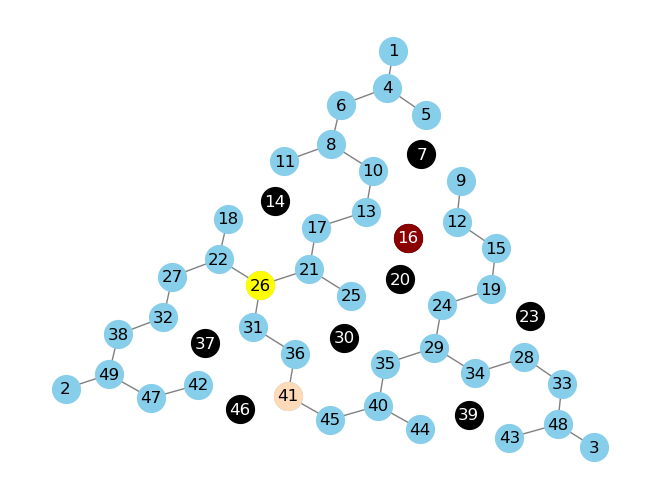

Barrier change: 16 -> 18
Barrier set 2: {37, 39, 7, 46, 14, 18, 20, 23, 30}


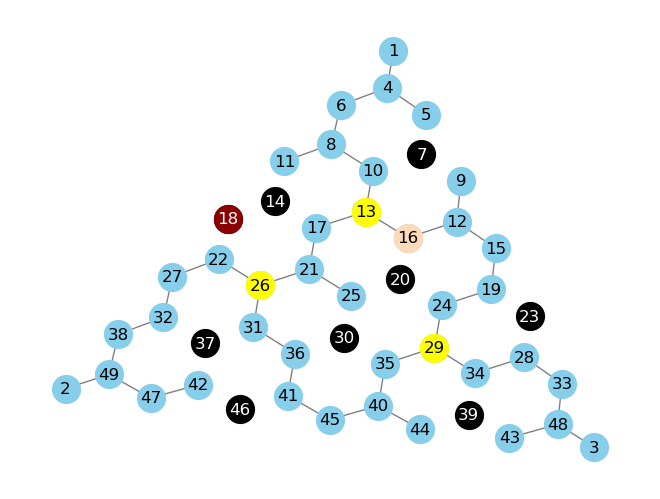

Barrier change: 37 -> 26
Barrier set 3: {39, 7, 46, 14, 18, 20, 23, 26, 30}


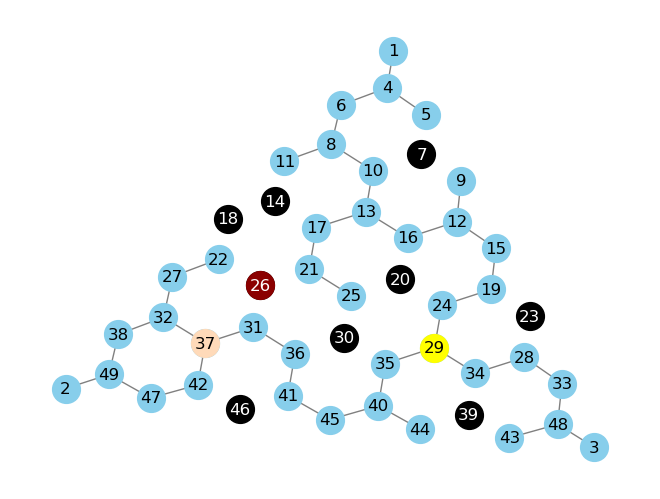

Barrier change: 30 -> 35
Barrier set 4: {35, 39, 7, 46, 14, 18, 20, 23, 26}


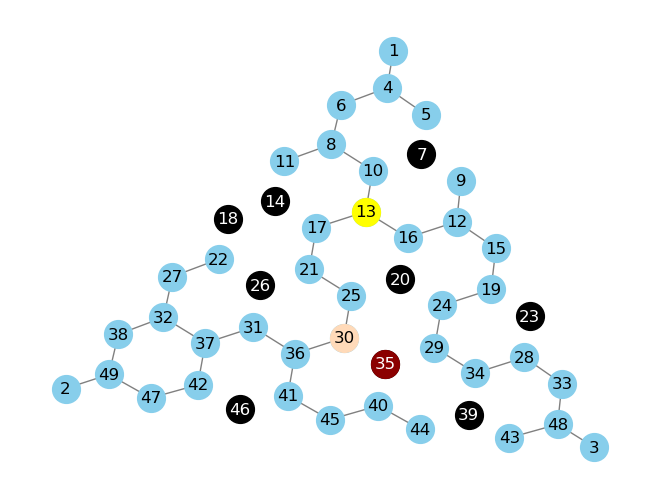

In [6]:
# Barrier change sequences are represented as a list of sequential sets of barriers.
example_barrier_sequence = [{37, 7, 39, 41, 14, 46, 20, 23, 30}, {37, 39, 7, 46, 14, 16, 20, 23, 30},
                            {37, 39, 7, 46, 14, 18, 20, 23, 30}, {39, 7, 46, 14, 18, 20, 23, 26, 30}, 
                            {35, 39, 7, 46, 14, 18, 20, 23, 26}]


# Use the function plot_barrier_change_sequence to visualize this barrier change sequence.
plot_barrier_change_sequence(example_barrier_sequence)

Here, we don't have to specify the old and new barrier locations - `plot_barrier_change_sequence` calculates these automatically based on which barriers are different between sets. 